In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
train = pd.read_csv('./titanic_dataset/train.csv')
test = pd.read_csv('./titanic_dataset/test.csv')
submission = pd.read_csv('./titanic_dataset/gender_submission.csv')

Pclass: 몇등석 (1,2,3)    
Sex: 성별 (male,female)  
Age: 나이 -> null값 많음  
sibsp: 혼자 탔는지 0, n명의 친인척과 같이 탔는지)   
parch: 혼자 탔는지 0,n명의 부모 자식과 같이 탔는지        
Fare: 탑승료  
Cabin: 객실 -> null값 많음 (의미 없음)      
Embarked: 탑승항구 -> null값 (train에 2개)  

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
train_df = train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_df = test.drop(['Name','Ticket'], axis=1)

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
 6   1         891 non-null    uint8  
 7   2         891 non-null    uint8  
 8   3         891 non-null    uint8  
 9   Female    891 non-null    uint8  
 10  Male      891 non-null    uint8  
dtypes: float64(2), int64(3), object(1), uint8(5)
memory usage: 46.2+ KB


In [59]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    object 
 6   1            418 non-null    uint8  
 7   2            418 non-null    uint8  
 8   3            418 non-null    uint8  
 9   Female       418 non-null    uint8  
 10  Male         418 non-null    uint8  
dtypes: float64(2), int64(3), object(1), uint8(5)
memory usage: 21.8+ KB


In [38]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [39]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [40]:
pclass_train_dummies = pd.get_dummies(train_df['Pclass'])
pclass_test_dummies = pd.get_dummies(test_df['Pclass'])

In [41]:
train_df.drop(['Pclass'], axis=1, inplace=True)
test_df.drop(['Pclass'], axis=1, inplace=True)

In [42]:
train_df = train_df.join(pclass_train_dummies)
test_df = test_df.join(pclass_test_dummies)

In [44]:
sex_train_dummies = pd.get_dummies(train_df['Sex'])
sex_test_dummies = pd.get_dummies(test_df['Sex'])

In [45]:
sex_train_dummies.columns = ['Female', 'Male']
sex_test_dummies.columns = ['Female', 'Male']

In [46]:
train_df.drop(['Sex'], axis=1, inplace=True)
test_df.drop(['Sex'], axis=1, inplace=True)

In [47]:
train_df = train_df.join(sex_train_dummies)
test_df = test_df.join(sex_test_dummies)

In [51]:
train_df["Age"].fillna(train_df["Age"].mean() , inplace=True)
test_df["Age"].fillna(train_df["Age"].mean() , inplace=True)

In [56]:
test_df["Fare"].fillna(0, inplace=True)

In [57]:
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [71]:
train_df["Embarked"].fillna('S', inplace=True)
test_df["Embarked"].fillna('S', inplace=True)

In [72]:
embarked_train_dummies = pd.get_dummies(train_df['Embarked'])
embarked_test_dummies = pd.get_dummies(test_df['Embarked'])

In [73]:
embarked_train_dummies.columns = ['S', 'C', 'Q']
embarked_test_dummies.columns = ['S', 'C', 'Q']

In [74]:
train_df.drop(['Embarked'], axis=1, inplace=True)
test_df.drop(['Embarked'], axis=1, inplace=True)

In [75]:
train_df = train_df.join(embarked_train_dummies)
test_df = test_df.join(embarked_test_dummies)

In [78]:
X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]

X_test  = test_df.drop("PassengerId",axis=1).copy()

In [82]:
X_train

,Age,SibSp,Parch,Fare,1,2,3,Female,Male,S,C,Q
0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.000000,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,13.0000,0,1,0,0,1,0,0,1
887,19.000000,0,0,30.0000,1,0,0,1,0,0,0,1
888,29.699118,1,2,23.4500,0,0,1,1,0,0,0,1
889,26.000000,0,0,30.0000,1,0,0,0,1,1,0,0


In [83]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [84]:
X_test

,Age,SibSp,Parch,Fare,1,2,3,Female,Male,S,C,Q
0,34.500000,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.000000,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.000000,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.000000,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.000000,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,29.699118,0,0,8.0500,0,0,1,0,1,0,0,1
414,39.000000,0,0,108.9000,1,0,0,1,0,1,0,0
415,38.500000,0,0,7.2500,0,0,1,0,1,0,0,1
416,29.699118,0,0,8.0500,0,0,1,0,1,0,0,1


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [86]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

C:\Users\SEC\anaconda3\envs\adas_project\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\SEC\anaconda3\envs\adas_project\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\SEC\anaconda3\envs\adas_project\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: 

0.8058361391694725

In [88]:
# Support Vector Machines

svc = SVC()

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

svc.score(X_train, Y_train)

C:\Users\SEC\anaconda3\envs\adas_project\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\SEC\anaconda3\envs\adas_project\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\SEC\anaconda3\envs\adas_project\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.6868686868686869

In [90]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

knn.score(X_train, Y_train)

C:\Users\SEC\anaconda3\envs\adas_project\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\SEC\anaconda3\envs\adas_project\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\SEC\anaconda3\envs\adas_project\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.835016835016835

In [91]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

C:\Users\SEC\anaconda3\envs\adas_project\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\SEC\anaconda3\envs\adas_project\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\SEC\anaconda3\envs\adas_project\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.9820426487093153

In [92]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv('titanic_1.csv', index=False)

# 튜토리얼

In [93]:
train = pd.read_csv('./titanic_dataset/train.csv')
test = pd.read_csv('./titanic_dataset/test.csv')
submission = pd.read_csv('./titanic_dataset/gender_submission.csv')

In [94]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


성별이 생존율에 영향 많이 줌

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [17]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
random_forest.fit(X, y)
predictions = random_forest.predict(X_test)

In [20]:
random_forest.score(X, y)

0.8159371492704826

In [18]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('titanic_2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Titanic - Machine Learning from Disaster

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('./titanic_dataset/train.csv')
test = pd.read_csv('./titanic_dataset/test.csv')
submission = pd.read_csv('./titanic_dataset/gender_submission.csv')

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Pclass: 몇등석 (1,2,3)  
Sex: 성별 (male,female)  
Age: 나이 -> null값 많음  
sibsp: 혼자 탔는지 0, n명의 친인척과 같이 탔는지)  
parch: 혼자 탔는지 0,n명의 부모 자식과 같이 탔는지  
Fare: 탑승료  
Cabin: 객실 -> null값 많음 (의미 없음)  
Embarked: 탑승항구 -> null값 (train에 2개)  

### 데이터 분석

In [4]:
def bar_chart(feature):
  survived = train.loc[train["Survived"]==1,feature].value_counts()  #해당 특징의 Survived 가 1인 갯수를 세어준다.
  dead = train.loc[train["Survived"]==0,feature].value_counts()
  data = pd.DataFrame([survived,dead],index = ["Survived","Dead"])
  data.plot(kind="bar",figsize=(10,5))
  plt.show()

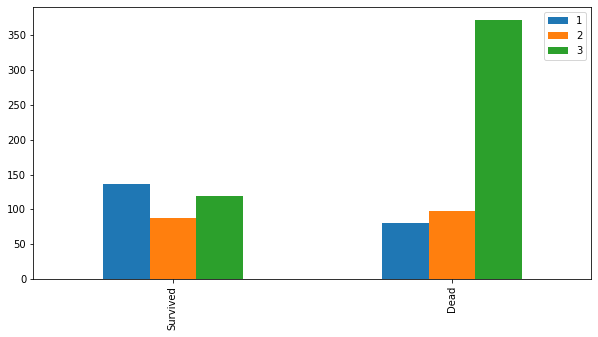

In [5]:
bar_chart("Pclass")

In [6]:
three = train.loc[train.Pclass == 3]["Survived"]
rate_three= sum(three)/len(three)

print("% of three who survived:", rate_three)

% of three who survived: 0.24236252545824846


3등석이 사망율이 높음

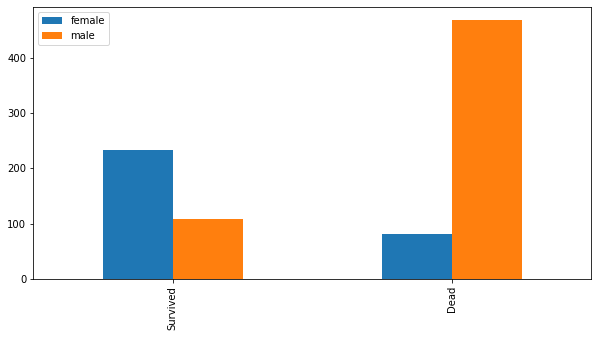

In [7]:
bar_chart("Sex")

In [8]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [9]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


여자가 생존율이 높음

In [10]:
train['Familysize']=train['SibSp'] + train['Parch']

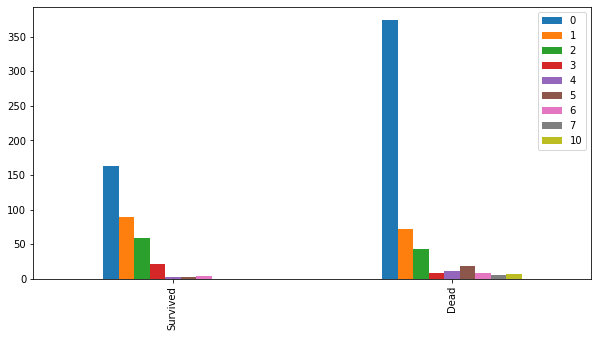

In [11]:
bar_chart("Familysize")

혼자 탄 경우가 사망율이 높음

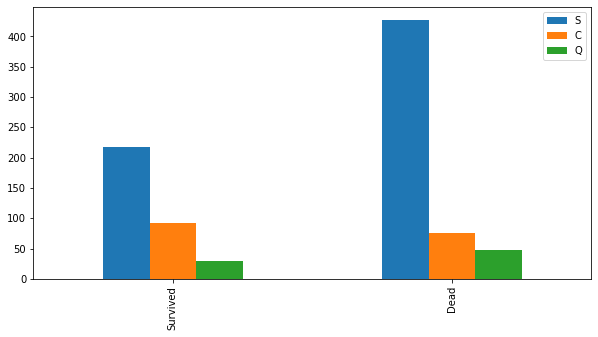

In [12]:
bar_chart("Embarked")

In [13]:
S = train.loc[train.Embarked == 'S']["Survived"]
rate_S = sum(S)/len(S)

print("% of S who survived:", rate_S)

% of S who survived: 0.33695652173913043


In [14]:
C = train.loc[train.Embarked == 'C']["Survived"]
rate_C = sum(C)/len(C)

print("% of C who survived:", rate_C)

% of C who survived: 0.5535714285714286


In [15]:
Q = train.loc[train.Embarked == 'Q']["Survived"]
rate_Q = sum(Q)/len(Q)

print("% of Q who survived:", rate_Q)

% of Q who survived: 0.38961038961038963


S에서 탄 경우 사망율이 높음  
C에서 탄 경우 생존율이 높음

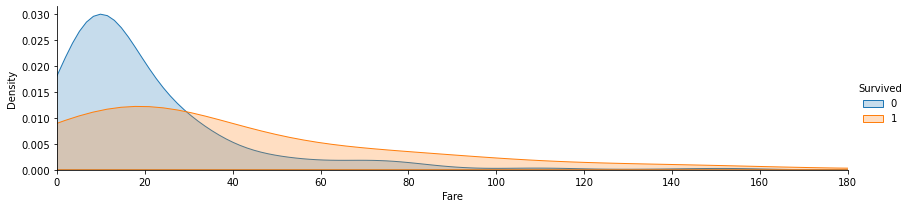

In [16]:
#fare 에 따른 생존/사망자 확인
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.xlim(0,180)
plt.show()

탑승료가 적을수록 사망율이 높음

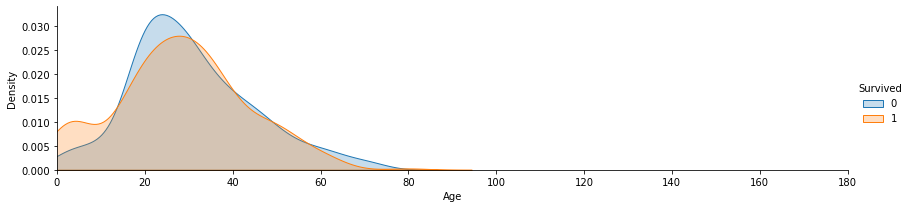

In [17]:
#age 에 따른 생존/사망자 확인
facet = sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(0,180)
plt.show()

나이가 어릴수록 생존율이 높음

### 데이터 전처리

In [31]:
train = pd.read_csv('./titanic_dataset/train.csv')
test = pd.read_csv('./titanic_dataset/test.csv')
submission = pd.read_csv('./titanic_dataset/gender_submission.csv')

In [32]:
train_df = train.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis=1)
test_df = test.drop(['Name','Ticket','Cabin'], axis=1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


##### Sex 성별

In [33]:
#데이터를 숫자로
train_df['Sex']=train_df['Sex'].apply(lambda x:1 if (x=='female') else 0)
test_df['Sex']=test_df['Sex'].apply(lambda x:1 if (x=='female') else 0)
train_df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

##### Age 나이

In [34]:
# 평균으로 결측치 채우기
train_df['Age'].fillna(train_df['Age'].mean() , inplace=True)
test_df['Age'].fillna(train_df['Age'].mean() , inplace=True)

In [35]:
# 나이 구간화 
#영‧유아(0~5세)
#아동(6~12세)
#청소년(13~18세)
#청년(19~29세)
#중년(30~49세)
#장년(50~64세)
#노년(65세 이상)

ranges=[0,5,12,18,29,49,64,81]
labels=[0,1,2,3,4,5,6]
train_df["Age"]=pd.cut(train_df['Age'],ranges,right=False,labels=labels)
test_df["Age"]=pd.cut(test_df['Age'],ranges,right=False,labels=labels)

train_df['Age'].value_counts()

4    447
3    251
5     67
2     45
0     40
1     28
6     13
Name: Age, dtype: int64

##### Familysize 가족수

In [36]:
train_df['Familysize']=train_df['SibSp'] + train_df['Parch']
test_df['Familysize']=test_df['SibSp'] + test_df['Parch']

In [37]:
train_df = train_df.drop(['SibSp','Parch'], axis=1)
test_df = test_df.drop(['SibSp','Parch'], axis=1)
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize
0,0,3,0,3,7.2500,S,1
1,1,1,1,4,71.2833,C,1
2,1,3,1,3,7.9250,S,0
3,1,1,1,4,53.1000,S,1
4,0,3,0,4,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,0,3,13.0000,S,0
887,1,1,1,3,30.0000,S,0
888,0,3,1,4,23.4500,S,3
889,1,1,0,3,30.0000,C,0


##### Fare 탑승료

In [38]:
#결측치
test_df["Fare"].fillna(0, inplace=True)

In [39]:
train_df['Fare'] = pd.qcut(train_df['Fare'], 5)
test_df['Fare'] = pd.qcut(test_df['Fare'], 5)

train_df['Fare']

0        (-0.001, 7.854]
1      (39.688, 512.329]
2          (7.854, 10.5]
3      (39.688, 512.329]
4          (7.854, 10.5]
             ...        
886       (10.5, 21.679]
887     (21.679, 39.688]
888     (21.679, 39.688]
889     (21.679, 39.688]
890      (-0.001, 7.854]
Name: Fare, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [41]:
train_df['Fare'] = train_df['Fare'].astype('category').cat.codes
test_df['Fare'] = test_df['Fare'].astype('category').cat.codes

train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize
0,0,3,0,3,0,S,1
1,1,1,1,4,4,C,1
2,1,3,1,3,1,S,0
3,1,1,1,4,4,S,1
4,0,3,0,4,1,S,0
...,...,...,...,...,...,...,...
886,0,2,0,3,2,S,0
887,1,1,1,3,3,S,0
888,0,3,1,4,3,S,3
889,1,1,0,3,3,C,0


##### Embarked 탑승항구 

In [42]:
# 결측치 채우기
train_df["Embarked"].fillna('S', inplace=True)

In [43]:
#숫자로 매핑
train_df['Embarked']=train_df['Embarked'].apply(lambda x:0 if (x=='S') else (1 if(x=='C') else 2))
test_df['Embarked']=test_df['Embarked'].apply(lambda x:0 if (x=='S') else (1 if(x=='C') else 2))
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize
0,0,3,0,3,0,0,1
1,1,1,1,4,4,1,1
2,1,3,1,3,1,0,0
3,1,1,1,4,4,0,1
4,0,3,0,4,1,0,0
...,...,...,...,...,...,...,...
886,0,2,0,3,2,0,0
887,1,1,1,3,3,0,0
888,0,3,1,4,3,0,3
889,1,1,0,3,3,1,0


### Prediction

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [47]:
y = train_df["Survived"]

X = train_df[['Pclass','Sex','Age','Fare','Embarked','Familysize']]

X_test = test_df[['Pclass','Sex','Age','Fare','Embarked','Familysize']]

In [48]:
#K_fold cross validation 준비, 10개 구역을 나눔.
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

In [49]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
score_knn = cross_val_score(knn,X,y,cv=k_fold,n_jobs=1,scoring='accuracy')

In [50]:
#의사결정 트리
dt = DecisionTreeClassifier()
score_dt = cross_val_score(dt,X,y,cv=k_fold,n_jobs=1,scoring='accuracy')

In [51]:
#랜덤 포레스트
rf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0)
score_rf = cross_val_score(rf, X, y, cv=k_fold, scoring='accuracy', ).mean()

In [52]:
#SVM
sv = svm.SVC(gamma='auto')
score_sv = cross_val_score(sv,X,y,cv=k_fold,n_jobs=1,scoring='accuracy')

In [53]:
#정확도 확인
print("KNN   :",round(np.mean(score_knn)*100,2))
print("DecisionTree :",round(np.mean(score_dt)*100,2))
print("RandomForest :",round(np.mean(score_rf)*100,2))
print("SVM   :",round(np.mean(score_sv)*100,2))

KNN   : 79.8
DecisionTree : 80.36
RandomForest : 82.71
SVM   : 82.27


## 0.78947

In [385]:
#랜덤포레스트로 모델을 훈련
rf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0)
rf.fit(X, y)
predictions = rf.predict(X_test)

In [387]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('titanic_6.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


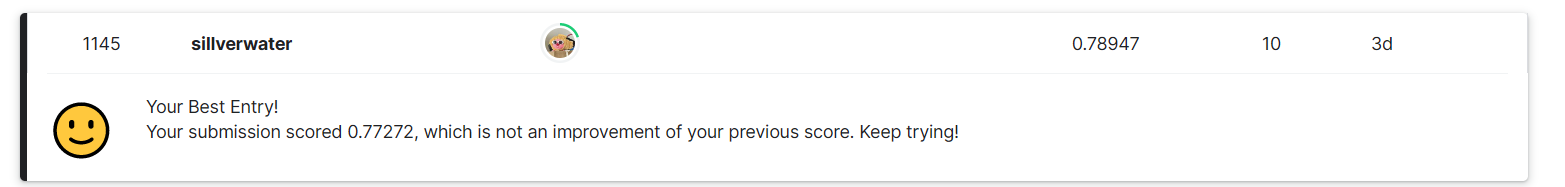

### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [490]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [491]:
X_train, x_test, y_train, y_test= train_test_split(X, y,test_size=0.3, random_state=123)
xg_cl = xgb.XGBClassifier(objective='binary:logistic',n_estimators=20, seed=123)
xg_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=123, ...)

In [492]:
#예측하기
preds = xg_cl.predict(x_test)

In [493]:
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.835821


In [494]:
predictions = xg_cl.predict(X_test)

In [495]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('titanic_9.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [498]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [503]:
from sklearn.ensemble import RandomForestClassifier

X_train, x_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=123)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

param={'n_estimators':[100,200,300],
       'max_depth':[6,8,10,12],
       'min_samples_leaf':[3,5,7,10,15],
       'min_samples_split':[2,3,5,10]
    
}
rf = RandomForestClassifier(n_estimators=100,
                              n_jobs=-1,
                              random_state=0,warm_start=True)
random_search = RandomizedSearchCV(rf, param_distributions=param, scoring='accuracy', cv=skf.split(X_train,y_train))
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001C1FD808F20>,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=0,
                                                    warm_start=True),
                   param_distributions={'max_depth': [6, 8, 10, 12],
                                        'min_samples_leaf': [3, 5, 7, 10, 15],
                                        'min_samples_split': [2, 3, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy')

In [504]:
random_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 3,
 'min_samples_leaf': 5,
 'max_depth': 10}

In [505]:
#예측하기
preds = random_search.predict(x_test)
#정확도
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.860335


In [508]:
random_search.score(X,y)

0.8462401795735129

In [509]:
predictions = random_search.predict(X_test)

In [510]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('titanic_10.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
